In [14]:
import numpy as np
import pysal
import libpysal
from esda.moran import Moran,Moran_Local
from libpysal.weights import lat2W
import seaborn as sns
import matplotlib.pyplot as plt
import properscoring as ps
import warnings
from scipy import stats
from utils.evaluation import plot_predictions,plot_histogram,calc_peak,calc_mean
from utils.metrics import calculate_crps
from sklearn.metrics import mean_squared_error
from math import sqrt
warnings.filterwarnings("ignore")
sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))

(16253, 10, 10)
(16253, 100, 100, 10)
[[1.36469845e-02 1.37824239e-02 1.42132826e-02 ... 9.32764488e-06
  6.99830753e-06 5.62277637e-06]
 [1.44276107e-02 1.43894125e-02 1.46005005e-02 ... 1.26155164e-05
  9.81399444e-06 8.35267565e-06]
 [1.29167829e-02 1.25844544e-02 1.27226710e-02 ... 2.40748741e-05
  1.91745603e-05 1.54350910e-05]
 ...
 [7.66749680e-02 7.69362301e-02 7.14279860e-02 ... 6.02639079e-01
  5.05207419e-01 4.10285980e-01]
 [9.99762490e-02 9.90582928e-02 9.09953937e-02 ... 3.56428385e-01
  2.83229768e-01 2.12939918e-01]
 [9.69178006e-02 9.59543064e-02 8.91171619e-02 ... 1.85139462e-01
  1.27345592e-01 9.26754028e-02]]
show
72.125
86.88921356201172
51.871815
43.625
42.39467239379883
18.170303
53.6875
45.85065460205078
22.034012
54.75
58.60834503173828
23.184355


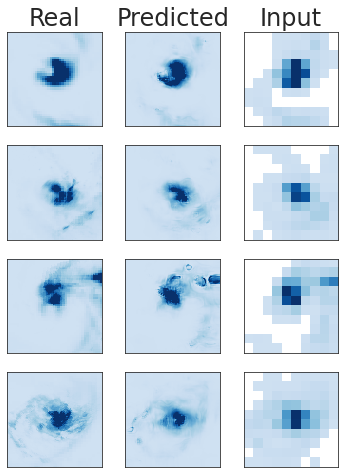

In [17]:
model = '_cat1_storms'
model = '_TS-0plus'
model = ''
# set mode
mode = 'validation'
# mode = 'extreme_valid'
print(np.load('/user/home/al18709/work/tc_data_mswep/valid_X.npy').shape)


# load datasets
real = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode))[0][:,:,:,0]
pred = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0][:,:,:,0]
pred_ensemble = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0]
inputs = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_input-opt.npy' % (model,mode))[0][:,:,:,0]

# train_X = np.load('/user/work/al18709/tc_data_mswep/train_X.npy')
# train_y = np.load('/user/work/al18709/tc_data_mswep/train_y.npy')

print(pred_ensemble.shape)
print(pred[-1,:,:])
# real_train = np.load('/user/home/al18709/work/cgan_predictions/train_real.npy')[0][:,:,:,0]
# pred_train = np.load('/user/home/al18709/work/cgan_predictions/train_pred.npy')[0][:,:,:,0]
# inputs_train = np.load('/user/home/al18709/work/cgan_predictions/train_input.npy')[0][:,:,:,0]
plot_predictions(real,pred,inputs,plot='show',mode = mode)
# print(np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode)).shape)
# pred1 = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode))[0][:,:,:,1]
# plot_predictions(real,pred1,inputs,plot='show')
# pred2 = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0][:,:,:,2]
# plot_predictions(real,pred2,inputs,plot='show')
# pred3 = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_input-opt.npy' % (model,mode))[0][:,:,:,3]
# plot_predictions(real,pred3,inputs,plot='show')

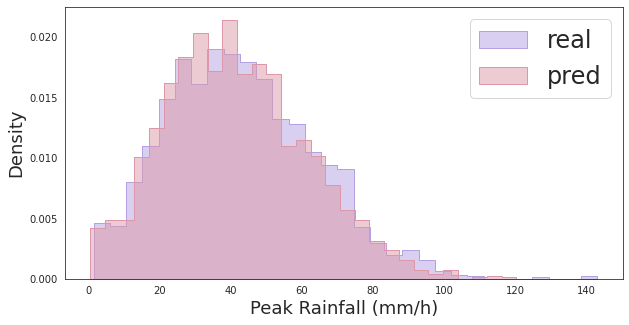

KstestResult(statistic=0.038, pvalue=0.11135887905231429)
KstestResult(statistic=0.038, pvalue=0.11135887905231429)


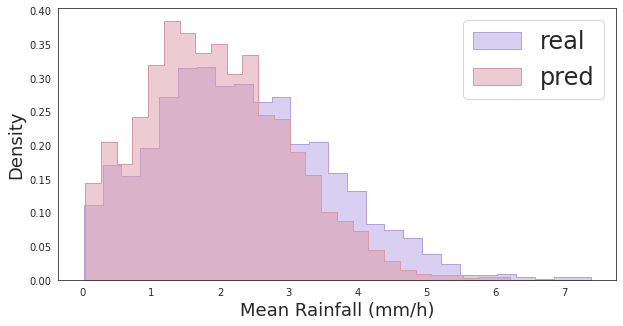

KstestResult(statistic=0.131, pvalue=2.2698876601340365e-15)
KstestResult(statistic=0.0, pvalue=1.0)
mean real:  2.3233461
mean pred:  1.9672815550045715
std real:  4.7810183
std pred:  4.407526575661774


In [9]:
# metric 1
# A standard metric to check how the distributions compare
# TODO: integrate ensemble predictions
# distributions
peak_reals = calc_peak(real)
peak_preds = calc_peak(pred)
plot_histogram(peak_reals,peak_preds,5,0.5,type = 'Peak')
ks = stats.kstest(peak_reals, peak_preds)
print(ks)
ks = stats.ks_2samp(peak_reals, peak_preds)
print(ks)

mean_reals = calc_mean(real)
mean_preds = calc_mean(pred)
plot_histogram(mean_reals,mean_preds,5,0.5)
ks = stats.kstest(mean_reals, mean_preds)
print(ks)
ks = stats.kstest(mean_preds,mean_preds)
print(ks)


print('mean real: ',np.mean(real))
print('mean pred: ', np.mean(pred))
print('std real: ',np.std(real))
print('std pred: ',np.std(pred))
# ks null hypothesis: two samples drawn from populations with the same distributions
# if p-value is small then you can reject the null hypothesis
# I think we want the p value to be large? or close to 1?

# TODO: could do the same thing for the 90th percentile or just the extreme validation set

In [10]:
# metric 2 
# common probabilistic forecasting score
# CRPS
crps = calculate_crps(real,pred_ensemble)
print(crps.shape)
print(np.mean(np.mean(crps,axis=1),axis=1))
print(np.mean(crps))

crps = ps.crps_ensemble(real,pred_ensemble)
print(crps.shape)
print(np.mean(np.mean(crps,axis=1),axis=1))
print('mean crps: ',np.mean(crps))

(2000, 100, 100)
[0.5418259  0.43231067 0.47086856 ... 0.7990523  0.70312864 1.0339942 ]
0.68452233
(2000, 100, 100)
[0.54182589 0.43231072 0.4708685  ... 0.79905233 0.70312868 1.03399421]
mean crps:  0.6845214375774838


In [11]:
# metric 3
# standard sanity check, though not usually for stochastic models
# RMSE
nimages,_,_ = real.shape
RMSE = []
for i in range(nimages):
	rmse = sqrt(mean_squared_error(real[i], pred[i]))
	RMSE.append(rmse)

print(np.mean(RMSE))

2.0411402698008247


In [19]:
# metric 4
# metric to look specifically at spatial structure
# https://gis.stackexchange.com/questions/273785/morans-i-on-2d-arrays-rasters
# Spatial Correlation
# Moran's I - positive, negative autocorrelation - positive means similar values are clustered together and negative mean there's no spatial pattern
# https://journals.ametsoc.org/view/journals/mwre/136/6/2007mwr2255.1.xml
# https://d1wqtxts1xzle7.cloudfront.net/49336481/Probabilistic_rainfall_thresholds_for_fl20161004-25957-1lpf9s8-with-cover-page-v2.pdf?Expires=1646313112&Signature=A~uO2wqiCKdkqPu~QolyURBkRguxzw9P84Yfw8PrWYRkrOXMDyxAaxQmJafqcQOtr1FR68gWjq3MaLa2KFV3OwSvhB8douIzF4TJDXSPChkdwAh7p-Yc5A5WNPCFTMZkGJ-DyP60hZObnZUKs7y45FUcM9sWIbLfMgIuZXrW7vzf8vIXeQi-44LzV98XKYItKe7DAaTxyEWHGmWdFmlwKmBi~88P6rxAZd5xvNIsb4qzWNY~go-fKV~5oTcPQcF2VcsINGMjOkeywMxJQSm0cwHKpmS-ikhiXkBa5BrqsbwRQLNcJnbsWj-berQFW111h2ODWsAIAGp1AcF8qyuTdg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

i=50
# w = pysal.lat2W(real[0].shape[0],real[0].shape[1], rook=False, id_type="int")
w = lat2W(real[0].shape[0],real[0].shape[1], rook=False, id_type="int")
mir = Moran(real[0], w, permutations = 9999)
lm = Moran_Local(real[i].astype('float64'),w)
moran_significance = np.reshape(lm.p_sim, real[i].shape)
print(mir.I)
w = lat2W(pred[i].shape[0],pred[0].shape[1], rook=False, id_type="int")
mir = Moran(pred[i], w, permutations = 9999)
lm = Moran_Local(pred[i],w)
moran_significance = np.reshape(lm.p_sim, pred[i].shape)
print(mir.I)
# print(lm)
# print(moran_significance)

0.9677333571594734
0.9653585669748946


In [36]:
# metric 6
# Accumulated Rainfall


In [ ]:
# metric 7 
# Similarity Score